# Project 2: Ames Housing Saleprice Challenge (Part 2)

## Problem Statement:


Housing prices are dependent upon many factors, the question therefore is to determine which features play a bigger impact on increasing or decreasing the overall housing sale price. Using the Ames housing data, the goal of this project is to create a regression model that is able to accurately predict the sale price of each house in Ames, IA. The evaluation of this project will be done through a Kaggle submission, with leaderboard standings determined by the root mean squared error (RMSE) of your predicted house sale price vs. the actual house sale price.

## Executive Summary

### Contents (Part 2):
- [6. Feature Engineering and Modelling](#6.-Feature-Engineering-and-Modelling)
- [7. Pre-processing and prediction of actual test data](#7.-Pre-processing-and-prediction-of-actual-test-data)
- [8. Final test scores](#8.-Final-test-scores)
- [9. Conclusion](#9.-Conclusion)

## Importing the Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 6. Feature Engineering and Modelling

In [2]:
# Reading in the EDA dataset

df_fe = pd.read_csv("./datasets/train_clean_eda.csv", na_filter=False)

In [3]:
df_fe.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Street,Land Contour,Neighborhood,Condition 1,Bldg Type,...,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Sale Type,SalePrice
0,0,109,533352170,60,RL,Pave,Lvl,Sawyer,RRAe,1Fam,...,NA,Attchd,1976.0,RFn,2.0,475.0,TA,Y,WD,130500
1,1,544,531379050,60,RL,Pave,Lvl,SawyerW,Norm,1Fam,...,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,WD,220000
2,2,153,535304180,20,RL,Pave,Lvl,NAmes,Norm,1Fam,...,NA,Detchd,1953.0,Unf,1.0,246.0,TA,Y,WD,109000
3,3,318,916386060,60,RL,Pave,Lvl,Timber,Norm,1Fam,...,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,WD,174000
4,4,255,906425045,50,RL,Pave,Lvl,SawyerW,Norm,1Fam,...,NA,Detchd,1957.0,Unf,2.0,484.0,TA,N,WD,138500


In [4]:
df_fe.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df_fe.head()

,Id,PID,MS SubClass,MS Zoning,Street,Land Contour,Neighborhood,Condition 1,Bldg Type,House Style,...,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Sale Type,SalePrice
0,109,533352170,60,RL,Pave,Lvl,Sawyer,RRAe,1Fam,2Story,...,NA,Attchd,1976.0,RFn,2.0,475.0,TA,Y,WD,130500
1,544,531379050,60,RL,Pave,Lvl,SawyerW,Norm,1Fam,2Story,...,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,WD,220000
2,153,535304180,20,RL,Pave,Lvl,NAmes,Norm,1Fam,1Story,...,NA,Detchd,1953.0,Unf,1.0,246.0,TA,Y,WD,109000
3,318,916386060,60,RL,Pave,Lvl,Timber,Norm,1Fam,2Story,...,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,WD,174000
4,255,906425045,50,RL,Pave,Lvl,SawyerW,Norm,1Fam,1.5Fin,...,NA,Detchd,1957.0,Unf,2.0,484.0,TA,N,WD,138500


### 6.1) Splitting and Scaling Training and Test-datasets

In [6]:
df_fe.head()

,Id,PID,MS SubClass,MS Zoning,Street,Land Contour,Neighborhood,Condition 1,Bldg Type,House Style,...,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Paved Drive,Sale Type,SalePrice
0,109,533352170,60,RL,Pave,Lvl,Sawyer,RRAe,1Fam,2Story,...,NA,Attchd,1976.0,RFn,2.0,475.0,TA,Y,WD,130500
1,544,531379050,60,RL,Pave,Lvl,SawyerW,Norm,1Fam,2Story,...,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,WD,220000
2,153,535304180,20,RL,Pave,Lvl,NAmes,Norm,1Fam,1Story,...,NA,Detchd,1953.0,Unf,1.0,246.0,TA,Y,WD,109000
3,318,916386060,60,RL,Pave,Lvl,Timber,Norm,1Fam,2Story,...,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,WD,174000
4,255,906425045,50,RL,Pave,Lvl,SawyerW,Norm,1Fam,1.5Fin,...,NA,Detchd,1957.0,Unf,2.0,484.0,TA,N,WD,138500


In [7]:
features = [i for i in df_fe.columns if i not in ["SalePrice", "Id", "PID"]]
X = df_fe[features]
y = df_fe["SalePrice"]

In [8]:
X.shape   # X is in order

(2051, 47)

In [9]:
y.shape   # y is in order

(2051,)

In [10]:
# Splitting the dataset, without shuffle

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18, shuffle=False)

### 6.2) Separating features into Categorical and Continuous variables

In [11]:
X_train.columns   # Types of columns in dataset

Index(['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Paved Drive',
       'Sale Type'],
      dtype='object')

In [12]:
len(X_train.columns)   # There are 47 features in this dataset

47

In [13]:
continuous = ["Mas Vnr Area", "BsmtFin SF 1", "Total Bsmt SF", "Gr Liv Area", "Garage Area"]

categorical = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 
               'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
               'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
               'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 
               'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
               'Bsmt Exposure', 'BsmtFin Type 1', 'Heating QC', 'Central Air',
               'Electrical', 'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Kitchen AbvGr',
               'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
               'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
               'Garage Cars', 'Garage Qual', 'Paved Drive', 'Sale Type']

In [14]:
len(continuous) + len(categorical)   

# There are still 47 features after splitting into continous/categorical

47

### 6.3) Standard Scaling of Continuous Variables

In [15]:
ss = StandardScaler()

In [16]:
# Scaling the variables

X_train_ss = pd.DataFrame(ss.fit_transform(X_train[continuous]), columns=continuous)
X_test_ss = pd.DataFrame(ss.transform(X_test[continuous]), columns=continuous)

In [17]:
X_train_ss.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area
0,1.054210,0.197120,-0.726870,-0.036441,0.009205
1,0.174768,0.420026,-0.314061,1.265825,0.396903
2,-0.564635,0.621500,0.002133,-0.891117,-1.047732
3,-0.564635,-0.945278,-1.475636,-0.107327,-0.336953
4,-0.564635,-0.945278,-0.834464,-0.105301,0.050744


In [18]:
X_test_ss.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area
0,1.479927,-0.122237,-0.777374,0.498237,0.304594
1,-0.564635,1.120897,-0.004454,1.115953,0.364594
2,0.365220,0.992297,0.566452,-0.370615,0.706137
3,0.348416,-0.945278,0.766269,-0.186313,0.023051
4,-0.564635,-0.945278,-0.274537,-0.951876,-2.183131


### 6.4) Studying the Continuous Variables

#### 6.4.1) Engineering new continuous variables

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [20]:
# Engineering features on training dataset

X_poly_train = poly.fit_transform(X_train_ss)
X_poly_train[:2]

array([[ 1.05421008e+00,  1.97119618e-01, -7.26870323e-01,
        -3.64412410e-02,  9.20515883e-03,  1.11135889e+00,
         2.07805489e-01, -7.66274022e-01, -3.84167236e-02,
         9.70417123e-03,  3.88561439e-02, -1.43280401e-01,
        -7.18328351e-03,  1.81451739e-03,  5.28340467e-01,
         2.64880566e-02, -6.69095677e-03,  1.32796404e-03,
        -3.35447411e-04,  8.47349490e-05],
       [ 1.74768090e-01,  4.20026470e-01, -3.14061181e-01,
         1.26582504e+00,  3.96902519e-01,  3.05438853e-02,
         7.34072239e-02, -5.48878727e-02,  2.21225824e-01,
         6.93658951e-02,  1.76422236e-01, -1.31914009e-01,
         5.31680022e-01,  1.66709564e-01,  9.86344252e-02,
        -3.97546505e-01, -1.24651674e-01,  1.60231302e+00,
         5.02409145e-01,  1.57531610e-01]])

In [21]:
# Engineering features on testing dataset

X_poly_test = poly.fit_transform(X_test_ss)
X_poly_test[:2]

array([[ 1.47992722e+00, -1.22237314e-01, -7.77373570e-01,
         4.98237292e-01,  3.04593624e-01,  2.19018459e+00,
        -1.80902329e-01, -1.15045631e+00,  7.37354933e-01,
         4.50776396e-01,  1.49419610e-02,  9.50240573e-02,
        -6.09031885e-02, -3.72327065e-02,  6.04309667e-01,
        -3.87316502e-01, -2.36783033e-01,  2.48240400e-01,
         1.51759902e-01,  9.27772756e-02],
       [-5.64635367e-01,  1.12089705e+00, -4.45432358e-03,
         1.11595302e+00,  3.64594406e-01,  3.18813098e-01,
        -6.32898120e-01,  2.51506863e-03, -6.30106545e-01,
        -2.05862896e-01,  1.25641021e+00, -4.99283817e-03,
         1.25086845e+00,  4.08672795e-01,  1.98409985e-05,
        -4.97081586e-03, -1.62402146e-03,  1.24535115e+00,
         4.06870229e-01,  1.32929081e-01]])

In [22]:
# List of new engineering features

polynomials = pd.DataFrame(poly.get_feature_names(X_train_ss.columns), columns=["Eng Features"])
polynomials

,Eng Features
0,Mas Vnr Area
1,BsmtFin SF 1
2,Total Bsmt SF
3,Gr Liv Area
4,Garage Area
5,Mas Vnr Area^2
6,Mas Vnr Area BsmtFin SF 1
7,Mas Vnr Area Total Bsmt SF
8,Mas Vnr Area Gr Liv Area
9,Mas Vnr Area Garage Area


In [23]:
# Dataframe of engineered features (training set)

X_poly_train_df = pd.DataFrame(X_poly_train, columns=poly.get_feature_names(X_train_ss.columns))
X_poly_train_df.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Mas Vnr Area^2,Mas Vnr Area BsmtFin SF 1,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Gr Liv Area,Mas Vnr Area Garage Area,BsmtFin SF 1^2,BsmtFin SF 1 Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,BsmtFin SF 1 Garage Area,Total Bsmt SF^2,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2
0,1.054210,0.197120,-0.726870,-0.036441,0.009205,1.111359,0.207805,-0.766274,-0.038417,0.009704,0.038856,-0.143280,-0.007183,0.001815,0.528340,0.026488,-0.006691,0.001328,-0.000335,0.000085
1,0.174768,0.420026,-0.314061,1.265825,0.396903,0.030544,0.073407,-0.054888,0.221226,0.069366,0.176422,-0.131914,0.531680,0.166710,0.098634,-0.397547,-0.124652,1.602313,0.502409,0.157532
2,-0.564635,0.621500,0.002133,-0.891117,-1.047732,0.318813,-0.350921,-0.001204,0.503156,0.591586,0.386262,0.001326,-0.553829,-0.651165,0.000005,-0.001901,-0.002235,0.794089,0.933651,1.097742
3,-0.564635,-0.945278,-1.475636,-0.107327,-0.336953,0.318813,0.533737,0.833196,0.060600,0.190256,0.893550,1.394886,0.101454,0.318514,2.177501,0.158375,0.497220,0.011519,0.036164,0.113537
4,-0.564635,-0.945278,-0.834464,-0.105301,0.050744,0.318813,0.533737,0.471168,0.059457,-0.028652,0.893550,0.788801,0.099539,-0.047967,0.696330,0.087870,-0.042344,0.011088,-0.005343,0.002575


In [24]:
# Dataframe of engineered features (test set)

X_poly_test_df = pd.DataFrame(X_poly_test, columns=poly.get_feature_names(X_test_ss.columns))
X_poly_test_df.head().T

,0,1,2,3,4
Mas Vnr Area,1.479927,-0.564635,0.365220,0.348416,-0.564635
BsmtFin SF 1,-0.122237,1.120897,0.992297,-0.945278,-0.945278
Total Bsmt SF,-0.777374,-0.004454,0.566452,0.766269,-0.274537
Gr Liv Area,0.498237,1.115953,-0.370615,-0.186313,-0.951876
Garage Area,0.304594,0.364594,0.706137,0.023051,-2.183131
Mas Vnr Area^2,2.190185,0.318813,0.133386,0.121394,0.318813
Mas Vnr Area BsmtFin SF 1,-0.180902,-0.632898,0.362407,-0.329350,0.533737
Mas Vnr Area Total Bsmt SF,-1.150456,0.002515,0.206880,0.266980,0.155013
Mas Vnr Area Gr Liv Area,0.737355,-0.630107,-0.135356,-0.064914,0.537463
Mas Vnr Area Garage Area,0.450776,-0.205863,0.257896,0.008032,1.232673


#### 6.4.2) Establishing the naive linear regression score (no engineered variables)

In [25]:
# Fitting to engineered training data

lr = LinearRegression(fit_intercept = True, n_jobs=-1)
lr_mod = lr.fit(X_train_ss, y_train)

In [26]:
# Cross-validating naive lr model on training data

cross_val = cross_val_score(lr_mod, X_train_ss, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [ 0.66240515  0.73273658  0.72060503  0.75164455  0.77455422  0.77386185
 -0.08998521  0.73973394  0.77951192  0.77769486].

The mean cross_val score is 0.6622762892428884.


In [27]:
# Testing naive-lr model on full training data

training = lr_mod.score(X_train_ss, y_train)
print(f"The naive linear regression score for the training dataset is {training}.")

The naive linear regression score for the training dataset is 0.6956651171609041.


In [28]:
# Testing naive-lr model on full test data

testing = lr_mod.score(X_test_ss, y_test)
print(f"The naive linear regression score for the test dataset is {testing}.")

The naive linear regression score for the test dataset is 0.68410963448135.


**Comments:**
- By applying a naive linear regression, a score of 0.684 was obtained for the test dataset without feature engineering.
- This score will be our baseline to benchmark our subsequent scores.

#### 6.4.3) Using LassoCV to find the optimal lasso regression (no engineered variables)

In [29]:
# Instantiating LassoCV

lasso = LassoCV()
lasso_reg = lasso.fit(X_train_ss, y_train)

In [30]:
# Cross-validating lasso model using (non-engineered features training data)

cross_val = cross_val_score(lasso_reg, X_train_ss, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [ 0.65932537  0.72670101  0.71812976  0.74047639  0.76464369  0.7665369
 -0.08802803  0.73426057  0.76986097  0.77580402].

The mean cross_val score is 0.6567710642798263.


In [31]:
# Applying lasso model (non-engineered training data)

training = lasso_reg.score(X_train_ss, y_train)
print(f"The Lasso regression score for the engineered training dataset is {training}.")

The Lasso regression score for the engineered training dataset is 0.6946508547585992.


In [32]:
# Applying lasso model (non-engineered test data)

testing = lasso_reg.score(X_test_ss, y_test)
print(f"The naive linear regression score for the engineered test dataset is {testing}.")

The naive linear regression score for the engineered test dataset is 0.6823371393989823.


**Comments:**
- By applying a Lasso regression without feature engineering, a score of 0.682 was obtained for the test dataset.

#### 6.4.4) Testing linear regression (with new polynomial engineered variables)

In [33]:
# Fitting lr model onto engineered features (training data)

lr_mod = lr.fit(X_poly_train_df, y_train)

In [34]:
# Cross-validating naive lr model using engineered features (training data)

cross_val = cross_val_score(lr_mod, X_poly_train_df, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [ 0.64327553  0.74750683  0.75634662  0.77514053  0.78245817  0.77744445
 -3.54595088  0.72645573  0.79224798  0.75878767].

The mean cross_val score is 0.3213712629662347.


In [35]:
# Applying naive-lr model (engineered training data)

training = lr_mod.score(X_poly_train_df, y_train)
print(f"The naive linear regression score for the engineered training dataset is {training}.")

The naive linear regression score for the engineered training dataset is 0.7677284835685572.


In [36]:
# Applying naive-lr model (engineered test data)

testing = lr_mod.score(X_poly_test_df, y_test)
print(f"The naive linear regression score for the engineered test dataset is {testing}.")

The naive linear regression score for the engineered test dataset is 0.7623901282042401.


**Comments:**
- With feature engineering, a score of 0.762 was obtained using linear regression.

#### 6.4.5) Using LassoCV to find the optimal lasso regression (using all engineered continuous variables)

In [37]:
lasso_reg = lasso.fit(X_poly_train_df, y_train)

In [38]:
# Cross-validating Lasso model using engineered features (training data)

cross_val = cross_val_score(lasso_reg, X_poly_train_df, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [ 0.54086186  0.58693187  0.53177488  0.56893421  0.59030107  0.60943031
 -3.24643479  0.59071339  0.60450913  0.58707728].

The mean cross_val score is 0.19640992120071288.


In [39]:
# Applying LassoCV (engineered training data)

training = lasso_reg.score(X_poly_train_df, y_train)
print(f"The Lasso regression score for the engineered training dataset is {training}.")

The Lasso regression score for the engineered training dataset is 0.5937454413985896.


In [40]:
# Applying LassoCV (engineered test data)

testing = lasso_reg.score(X_poly_test_df, y_test)
print(f"The Lasso regression score for the engineered training dataset is {testing}.")

# This score is lower than naive linear regression

The Lasso regression score for the engineered training dataset is 0.5777683647192343.


#### Comments:
- Lasso regression with the engineered features did poorly, with a test score 0.578. This is as comparied with linear regression with engineered features, which scored 0.762.

#### 6.4.6) Visualising the residuals for Linear Regression

- Based on the above analysis, linear regression will be applied to categorical variables with polynomial feature engineering.

In [41]:
# Predicting the linear regression yhat of engineered polynomial features

lr_mod_yhat = lr_mod.predict(X_poly_test_df)

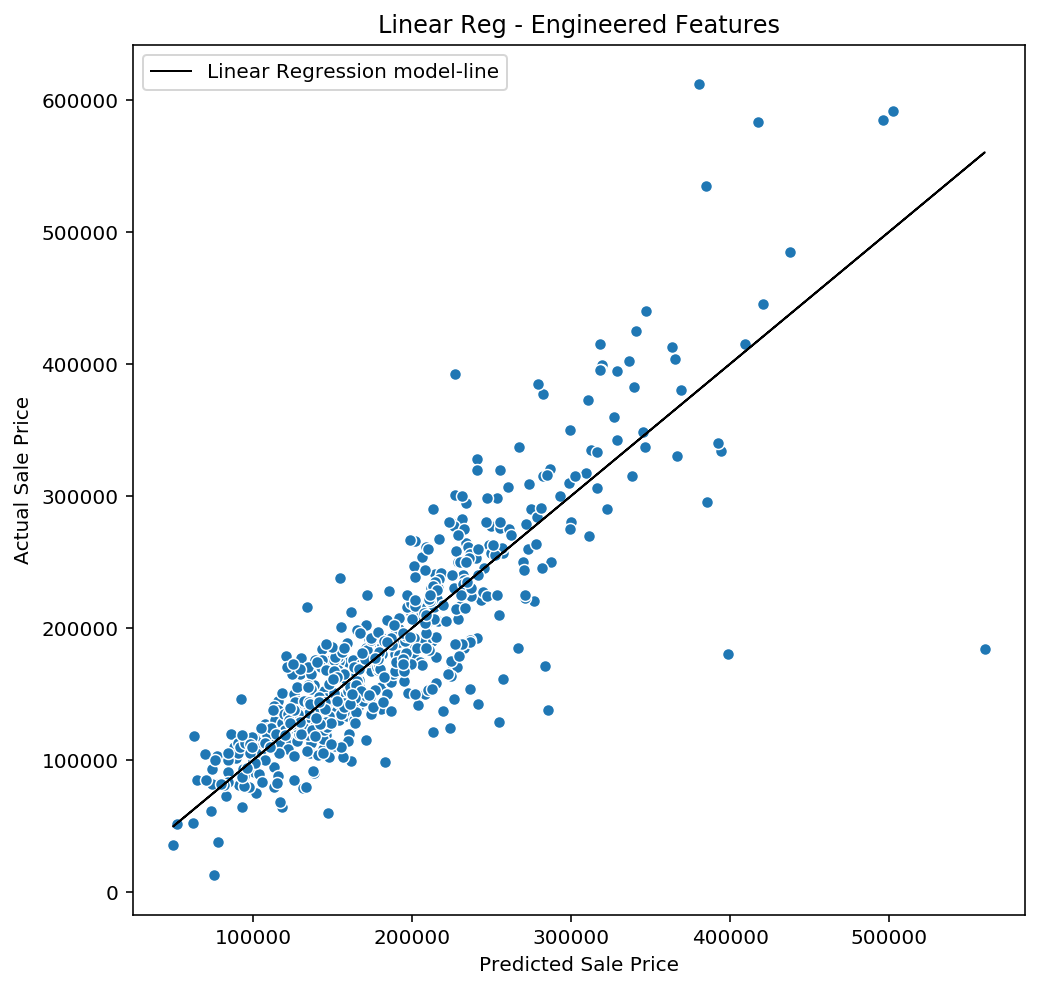

In [42]:
# Plotting the actual vs predicted price

plt.subplots(figsize=(8,8))
sns.scatterplot(x=lr_mod_yhat, y=y_test)

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Linear Reg - Engineered Features")
plt.plot(lr_mod_yhat, lr_mod_yhat, color = "k", linewidth=1, label="Linear Regression model-line")
plt.legend(loc="upper left");

In [43]:
# Getting the coefficients and features of this linear regression

polynomials["Coeff"] = lr_mod.coef_
polynomials

,Eng Features,Coeff
0,Mas Vnr Area,5872.824555
1,BsmtFin SF 1,13752.977583
2,Total Bsmt SF,21461.105679
3,Gr Liv Area,36406.326684
4,Garage Area,19109.212953
5,Mas Vnr Area^2,-1460.576499
6,Mas Vnr Area BsmtFin SF 1,2283.920845
7,Mas Vnr Area Total Bsmt SF,-421.492127
8,Mas Vnr Area Gr Liv Area,2351.140446
9,Mas Vnr Area Garage Area,3679.856806


In [44]:
# Calculating the correlation score

print("The correlation score is " + str(round(r2_score(lr_mod_yhat, y_test), 3)))

The correlation score is 0.687


In [45]:
# Calculating the RMSE

print("The RMSE is " + str(round(mean_squared_error(lr_mod_yhat, y_test)**0.5, 2)))

The RMSE is 39647.45


### 6.5) Studying the Categorical Variables

#### 6.5.1) Converting the datasets into dummy variables

In [46]:
# Finding the number of rows in the train dataset

len_train = len(X_train)

In [48]:
# Concatenating the training and test dataset for dummy variable encoding

X_train_test_concat = pd.concat([X_train, X_test])
X_train_test_concat = pd.get_dummies(X_train_test_concat.astype(str), drop_first=True)

In [49]:
X_train_test_concat.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# Splitting back the training and test dataset

X_train_dummy, X_test_dummy = X_train_test_concat.iloc[:len_train, :], X_train_test_concat.iloc[len_train:, :]

In [51]:
X_train_dummy.shape   # Correct number of rows (training dataset)

(1435, 4167)

In [52]:
X_test_dummy.shape   # Correct number of rows (test dataset)

(616, 4167)

#### 6.5.2) Applying linear regression on single categorical variables

In [53]:
# Defining a function to apply linear regression on every class of categorical variables

cross_val_mean = []
train_score = []
test_score = []


def lr_on_cat():
    
    for i in categorical:   # List of categorical variables
        
        # Print the categorical variable name
        print(f"{i}:")
        
        # Define the variable's training or testing dataset
        class1 = X_train_dummy.filter(regex=i)
        class2 = X_test_dummy.filter(regex=i)

        # Fitting the linear regression model
        lr_mod = lr.fit(class1, y_train)
        
        # Cross validation
        cross_val = cross_val_score(lr_mod, class1, y_train, cv = 10)
        print(f"--{i} cross_val score is\n {cross_val}.")
        print(f"--Mean {i} cross_val score is {round(cross_val.mean(),3)}.")
        cross_val_mean.append(round(cross_val.mean(),3))   # append the cross_val.mean into a list
        
        # Applying the linear regression model on training dataset
        training = lr_mod.score(class1, y_train)
        print(f"--{i} lin_reg score for dummy training dataset is {round(training,3)}.")
        train_score.append(round(training,3))   # append the training score into a list
        
        # Applying the linear regression model on test dataset
        testing = lr_mod.score(class2, y_test)
        print(f"-- {i} lin_reg score for dummy testing dataset is {round(testing,3)}.\n")
        test_score.append(round(testing,3))   # append the test score into a list
        

In [54]:
# Looping through all the categorical variables

lr_on_cat()

MS SubClass:
--MS SubClass cross_val score is
 [0.21813877 0.25010119 0.27203875 0.21239094 0.26962083 0.23067749
 0.17105291 0.17522892 0.19964926 0.35403534].
--Mean MS SubClass cross_val score is 0.235.
--MS SubClass lin_reg score for dummy training dataset is 0.251.
-- MS SubClass lin_reg score for dummy testing dataset is 0.265.

MS Zoning:
--MS Zoning cross_val score is
 [ 0.10825238  0.10634778  0.18392241  0.07702406  0.16909842  0.09765015
  0.14478384 -0.01137253  0.11819057  0.13050556].
--Mean MS Zoning cross_val score is 0.112.
--MS Zoning lin_reg score for dummy training dataset is 0.118.
-- MS Zoning lin_reg score for dummy testing dataset is 0.095.

Street:
--Street cross_val score is
 [ 5.93904135e-03 -2.09301427e-07 -7.35208189e-04 -7.41634410e-06
  2.96648561e-02 -2.13742695e-04 -5.01689754e-03 -8.89536837e-05
 -2.18871522e-03 -1.64145177e-03].
--Mean Street cross_val score is 0.003.
--Street lin_reg score for dummy training dataset is 0.007.
-- Street lin_reg score 

--Central Air lin_reg score for dummy training dataset is 0.083.
-- Central Air lin_reg score for dummy testing dataset is 0.064.

Electrical:
--Electrical cross_val score is
 [ 0.01903197  0.0272591  -0.00458881  0.12093233  0.10290968  0.06589837
  0.05982146  0.05430788  0.05213415  0.12560393].
--Mean Electrical cross_val score is 0.062.
--Electrical lin_reg score for dummy training dataset is 0.068.
-- Electrical lin_reg score for dummy testing dataset is 0.061.

Bsmt Full Bath:
--Bsmt Full Bath cross_val score is
 [ 0.08008113 -0.0179957   0.06279184  0.11021704  0.08758285  0.15696227
  0.02461489  0.0264712   0.12893717  0.06123727].
--Mean Bsmt Full Bath cross_val score is 0.072.
--Bsmt Full Bath lin_reg score for dummy training dataset is 0.088.
-- Bsmt Full Bath lin_reg score for dummy testing dataset is 0.069.

Full Bath:
--Full Bath cross_val score is
 [0.27936543 0.3323286  0.37207367 0.32504609 0.34182695 0.51115564
 0.36012709 0.30372445 0.41570492 0.38261093].
--Mean F

In [55]:
# Creating a dataframe of the above linear regression results

df_lr_cat = pd.DataFrame([cross_val_mean, train_score, test_score],
                        index=["cross_val_mean", "train_score", "test_score"],
                        columns=categorical)

In [56]:
# Dataframe of linear regression results

df_lr_cat.T.style.format("{:.3f}")

,cross_val_mean,train_score,test_score
MS SubClass,0.235,0.251,0.265
MS Zoning,0.112,0.118,0.095
Street,0.003,0.007,-0.001
Land Contour,0.056,0.068,0.019
Neighborhood,0.564,0.582,0.567
Condition 1,0.039,0.053,0.039
Bldg Type,0.042,0.048,0.022
House Style,0.048,0.064,0.094
Overall Qual,0.702,0.711,0.674
Overall Cond,0.145,0.156,0.177


#### Comments:
    
- From the above table, it can be observed that several categorical variables have a strong correlation with the sale price. These include:
    - Neighborhood
    - Overall Quality
    - Exterior Quality
    - Bsmt Quality
    - Kitchen Quality
    - Garage Cars
- These features will be added together to assess for their predicitive ability.

#### 6.5.3) Applying linear regression on candidate categorical predictors

In [57]:
# Getting the list of dummy candidates

candidate_list = ["Neighborhood", "Overall Qual", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Cars" ]
dummy_candidates = []

for i in candidate_list:
    var = X_train_dummy.filter(regex=i).columns
    for j in var:
        dummy_candidates.append(j)

In [58]:
# Total of 53 dummy candidates

len(dummy_candidates)

53

In [59]:
# pd.DataFrame of the dummy candidates

dummy_categoricals = pd.DataFrame(dummy_candidates, columns=["Dummy Variable"])
dummy_categoricals.head()

,Dummy Variable
0,Neighborhood_Blueste
1,Neighborhood_BrDale
2,Neighborhood_BrkSide
3,Neighborhood_ClearCr
4,Neighborhood_CollgCr


In [60]:
# Defining the dummy candidate training/testing dataset

candidate_X_train_dummy = X_train_dummy[dummy_candidates]
candidate_X_test_dummy = X_test_dummy[dummy_candidates]

In [61]:
# Training a new instance of linear regression model

lr = LinearRegression(fit_intercept = True, n_jobs=-1)
lr_mod = lr.fit(candidate_X_train_dummy, y_train)

In [62]:
# Cross validation

cross_val = cross_val_score(lr_mod, candidate_X_train_dummy, y_train, cv = 10)
print(f"The cross_val score is {cross_val}.\n")
print(f"The mean cross_val score is {round(cross_val.mean(),3)}.")

The cross_val score is [ 8.06780037e-01  8.12439220e-01  7.80619730e-01  8.49984658e-01
  8.10072405e-01  7.87231332e-01  7.40590692e-01 -4.71108593e+23
  8.15084474e-01  8.20159518e-01].

The mean cross_val score is -4.711085930792511e+22.


In [63]:
# Applying the linear regression model on training dataset

training = lr_mod.score(candidate_X_train_dummy, y_train)
print(f"The lin_reg score for dummy training dataset is {round(training,3)}.")

The lin_reg score for dummy training dataset is 0.824.


In [64]:
# Applying the linear regression model on test dataset

testing = lr_mod.score(candidate_X_test_dummy, y_test)
print(f"The lin_reg score for dummy testing dataset is {round(testing,3)}.\n")

The lin_reg score for dummy testing dataset is 0.784.



#### Comments:
- The application of linear regression on the selected dummy variable dataset gave a 0.784 test score.

#### 6.5.4) Applying LassoCV on candidate categorical predictors

In [65]:
# Instantiating a new instance of LassoCV

lasso = LassoCV()
lasso_reg = lasso.fit(candidate_X_train_dummy, y_train)

In [66]:
# Cross-validating lasso model using (non-engineered features training data)

cross_val = cross_val_score(lasso_reg, candidate_X_train_dummy, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [0.80709741 0.8105073  0.78145241 0.83963523 0.81166064 0.78690426
 0.74306824 0.81491926 0.81948432 0.81577908].

The mean cross_val score is 0.8030508156826153.


In [67]:
# Applying lasso model (training data)

training = lasso_reg.score(candidate_X_train_dummy, y_train)
print(f"The Lasso regression score for the training dataset is {training}.")

The Lasso regression score for the training dataset is 0.8231890731434661.


In [68]:
# Applying lasso model (test data)

testing = lasso_reg.score(candidate_X_test_dummy, y_test)
print(f"The Lasso regression score for the test dataset is {testing}.")

The Lasso regression score for the test dataset is 0.7814969585421009.


#### Comments:
- Application of Lasso regression to the selected dummy variable dataset gave a test score of 0.781.

#### 6.5.5) Visualizing the residuals of the categorical lasso regression

- Based on the selection and analysis of dummy variables, it appears that linear and lasso regression performs comparatively.

In [69]:
# Predicting the linear regression yhat of dummy test dataset

lr_mod_yhat = lr_mod.predict(candidate_X_test_dummy)

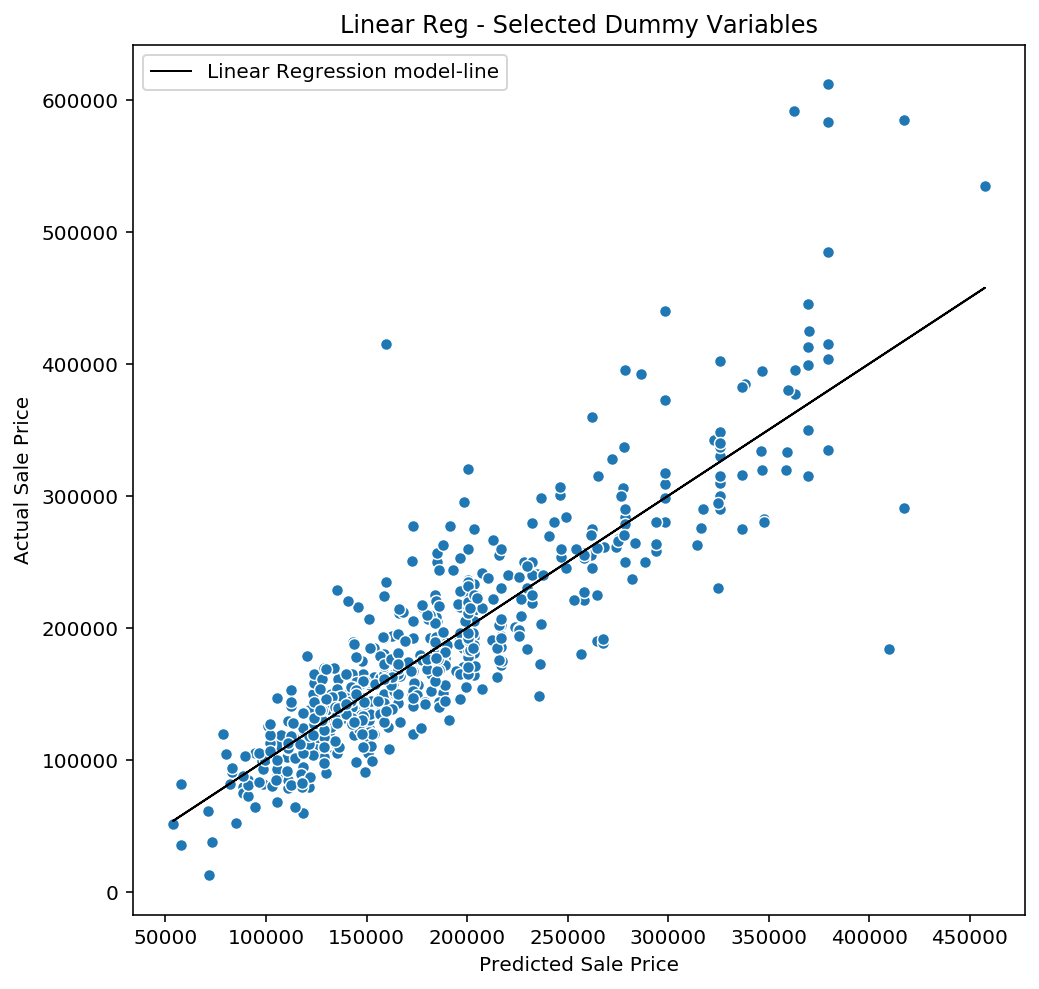

In [70]:
# Plotting the actual vs predicted price

plt.subplots(figsize=(8,8))
sns.scatterplot(x=lr_mod_yhat, y=y_test)

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Linear Reg - Selected Dummy Variables")
plt.plot(lr_mod_yhat, lr_mod_yhat, color = "k", linewidth=1, label="Linear Regression model-line")
plt.legend(loc="upper left");

In [71]:
# Getting the coefficients and features of this linear regression

dummy_categoricals["Coeff"] = lr_mod.coef_
dummy_categoricals.sort_values(by="Coeff", ascending=False)

,Dummy Variable,Coeff
27,Overall Qual_10,1.991675e+05
35,Overall Qual_9,1.422831e+05
9,Neighborhood_GrnHill,1.229674e+05
34,Overall Qual_8,1.092742e+05
17,Neighborhood_NoRidge,8.047278e+04
33,Overall Qual_7,7.983253e+04
3,Neighborhood_ClearCr,6.786644e+04
32,Overall Qual_6,6.545152e+04
51,Garage Cars_4.0,5.933249e+04
24,Neighborhood_StoneBr,5.396176e+04


In [72]:
# Calculating the correlation score

print("The correlation score is " + str(round(r2_score(lr_mod_yhat, y_test), 3)))

The correlation score is 0.698


In [73]:
# Calculating the RMSE

print("The RMSE is " + str(round(mean_squared_error(lr_mod_yhat, y_test)**0.5, 2)))

The RMSE is 37771.02


### 6.6) Creating a combined regression (continuous + categorical)

#### 6.6.1) Summary: Whats been happening so far?
- **Variables chosen:**
    - **Continuous**
        - `PolynomialFeatures`, degree=2, of "Mas Vnr Area", "BsmtFin SF 1", "Total Bsmt SF", "Gr Liv Area", "Garage Area")
    - **Categorical**
        - `get_dummies`, of "Neighborhood", "Overall Qual", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Cars"
- **Method scores:**
    - Continuous:
        - Linear: **0.684**
        - Linear + Feat.Eng: **0.762**
        - Lasso: **0.682**
        - Lasso + Feat.Eng: **0.578**
    - Categorical:
        - Linear: **0.784**
        - Lasso: **0.781**
- **Conclusions:**
    - By separating continuous and categorical variables, it is possible to achieve a strong correlation between predicted and actual housing sale prices in this Ames dataset.
    - However, it would still be worthwhile to observe is correlation could be further improved by combining both types of variables into a single linear regression formula.
    

#### 6.6.2) Combining the features into a single dataset

In [74]:
# Need to reset this index

candidate_X_test_dummy.reset_index(drop=True, inplace=True)
candidate_X_test_dummy.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Bsmt Qual_TA,Bsmt Qual_UnKn,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [75]:
# Combining training datasets

combined_train = X_poly_train_df.merge(candidate_X_train_dummy, how='outer', left_index=True, right_index=True)

In [76]:
# The shape is correct

combined_train.shape

(1435, 73)

In [77]:
combined_train.head(3)

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Mas Vnr Area^2,Mas Vnr Area BsmtFin SF 1,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Gr Liv Area,Mas Vnr Area Garage Area,...,Bsmt Qual_TA,Bsmt Qual_UnKn,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0
0,1.054210,0.197120,-0.726870,-0.036441,0.009205,1.111359,0.207805,-0.766274,-0.038417,0.009704,...,1,0,0,1,0,0,1,0,0,0
1,0.174768,0.420026,-0.314061,1.265825,0.396903,0.030544,0.073407,-0.054888,0.221226,0.069366,...,0,0,0,1,0,0,1,0,0,0
2,-0.564635,0.621500,0.002133,-0.891117,-1.047732,0.318813,-0.350921,-0.001204,0.503156,0.591586,...,1,0,0,1,0,1,0,0,0,0


In [78]:
# Combining test datasets

combined_test = X_poly_test_df.merge(candidate_X_test_dummy, how='outer', left_index=True, right_index=True)

In [79]:
X_poly_test_df.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Mas Vnr Area^2,Mas Vnr Area BsmtFin SF 1,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Gr Liv Area,Mas Vnr Area Garage Area,BsmtFin SF 1^2,BsmtFin SF 1 Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,BsmtFin SF 1 Garage Area,Total Bsmt SF^2,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2
0,1.479927,-0.122237,-0.777374,0.498237,0.304594,2.190185,-0.180902,-1.150456,0.737355,0.450776,0.014942,0.095024,-0.060903,-0.037233,0.604310,-0.387317,-0.236783,0.248240,0.151760,0.092777
1,-0.564635,1.120897,-0.004454,1.115953,0.364594,0.318813,-0.632898,0.002515,-0.630107,-0.205863,1.256410,-0.004993,1.250868,0.408673,0.000020,-0.004971,-0.001624,1.245351,0.406870,0.132929
2,0.365220,0.992297,0.566452,-0.370615,0.706137,0.133386,0.362407,0.206880,-0.135356,0.257896,0.984653,0.562089,-0.367760,0.700698,0.320868,-0.209936,0.399993,0.137356,-0.261705,0.498630
3,0.348416,-0.945278,0.766269,-0.186313,0.023051,0.121394,-0.329350,0.266980,-0.064914,0.008032,0.893550,-0.724337,0.176118,-0.021790,0.587168,-0.142766,0.017664,0.034713,-0.004295,0.000531
4,-0.564635,-0.945278,-0.274537,-0.951876,-2.183131,0.318813,0.533737,0.155013,0.537463,1.232673,0.893550,0.259514,0.899787,2.063666,0.075371,0.261325,0.599350,0.906067,2.078069,4.766061


In [80]:
# The shape is correct

combined_test.shape

(616, 73)

#### 6.6.4) Linear Regression of combined dataset

In [81]:
# Training a new instance of linear regression (Combined!)

lr = LinearRegression(fit_intercept = True, n_jobs=-1)
lr_mod = lr.fit(combined_train, y_train)

In [82]:
# Cross validation

cross_val = cross_val_score(lr_mod, combined_train, y_train, cv = 10)
print(f"The cross_val score is {cross_val}.\n")
print(f"The mean cross_val score is {round(cross_val.mean(),3)}.")

The cross_val score is [ 0.81951865  0.87110299  0.87534719  0.91054211  0.89453503  0.90821486
 -1.60083593  0.89694316  0.89540186  0.91411969].

The mean cross_val score is 0.638.


In [83]:
# Applying the linear regression model on training dataset

training = lr_mod.score(combined_train, y_train)
print(f"The lin_reg score for the combined training dataset is {round(training,3)}.")

The lin_reg score for the combined training dataset is 0.906.


In [84]:
# Applying the linear regression model on test dataset

testing = lr_mod.score(combined_test, y_test)
print(f"The lin_reg score for the combined testing dataset is {round(testing,3)}.\n")

The lin_reg score for the combined testing dataset is 0.856.



#### Comments:
- The application of linear regression on the combined dataset provided a test score of 0.856.
- There could be a potential of overfitting.

#### 6.6.5) Lasso Regression of combined dataset

In [85]:
# Instantiating a new instance of LassoCV (combined!)

lasso = LassoCV()
lasso_reg = lasso.fit(combined_train, y_train)

In [86]:
# Cross-validating lasso model using (non-engineered features training data)

cross_val = cross_val_score(lasso_reg, combined_train, y_train, cv = 10)

print(f"The individual cross_val score is\n {cross_val}.\n")
print(f"The mean cross_val score is {cross_val.mean()}.")

The individual cross_val score is
 [ 0.80459904  0.87121389  0.86975517  0.89508937  0.89138893  0.90505537
 -1.43737448  0.89292401  0.89879456  0.91316083].

The mean cross_val score is 0.6504606702116615.


In [87]:
# Applying lasso model (training data)

training = lasso_reg.score(combined_train, y_train)
print(f"The Lasso regression score for the training dataset is {training}.")

The Lasso regression score for the training dataset is 0.8904685618740806.


In [88]:
# Applying lasso model (test data)

testing = lasso_reg.score(combined_test, y_test)
print(f"The Lasso regression score for the test dataset is {testing}.")

The Lasso regression score for the test dataset is 0.8461409463468481.


#### Comments:
- Application of Lasso regression to the combined dataset gave a test score of 0.846.
- There could be the potential of overfitting.

#### 6.6.6) Visualization of the Linear and Lasso regression residuals

**Linear Regression**

In [89]:
# Predicting the linear regression yhat of combined dataset

lr_mod_yhat = lr_mod.predict(combined_test)

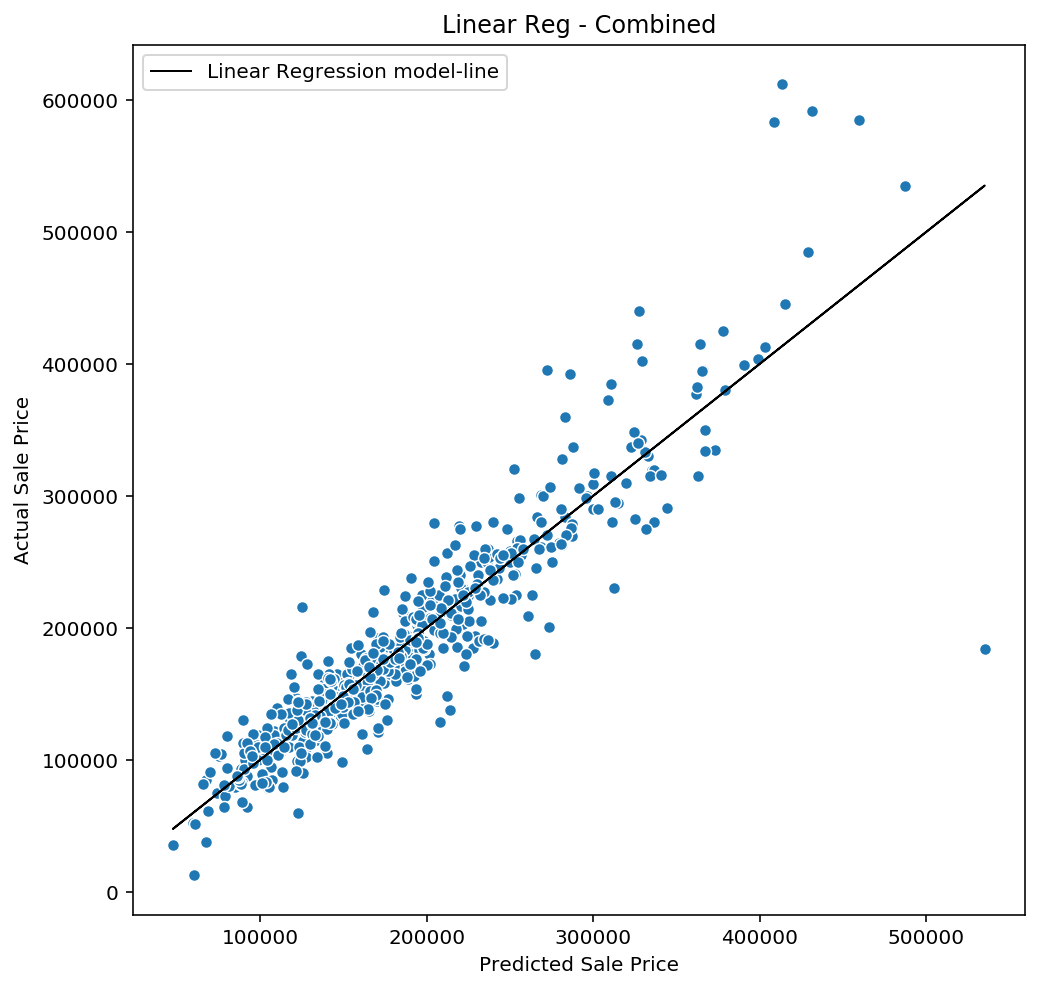

In [90]:
# Plotting the actual vs predicted price

plt.subplots(figsize=(8,8))
sns.scatterplot(x=lr_mod_yhat, y=y_test)

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Linear Reg - Combined")
plt.plot(lr_mod_yhat, lr_mod_yhat, color = "k", linewidth=1, label="Linear Regression model-line")
plt.legend(loc="upper left");

In [91]:
# Getting the coefficients and features of this linear regression

combined_features = pd.DataFrame(combined_test.columns, columns=["Predictors"])
combined_features["Coeff"] = lr_mod.coef_
combined_features.sort_values(by="Coeff", ascending=False)

,Predictors,Coeff
47,Overall Qual_10,131754.019070
29,Neighborhood_GrnHill,102370.455690
55,Overall Qual_9,92271.974348
54,Overall Qual_8,70048.499174
53,Overall Qual_7,53156.259879
52,Overall Qual_6,41775.848841
51,Overall Qual_5,32727.480697
44,Neighborhood_StoneBr,30685.501542
23,Neighborhood_ClearCr,27874.277119
50,Overall Qual_4,26069.262578


In [92]:
# Calculating the correlation score

print("The correlation score is " + str(round(r2_score(lr_mod_yhat, y_test), 3)))

The correlation score is 0.824


In [93]:
# Calculating the RMSE

print("The RMSE is " + str(round(mean_squared_error(lr_mod_yhat, y_test)**0.5, 2)))

The RMSE is 30864.89


**Lasso Regression**

In [94]:
# Predicting the lasso regression yhat of combined dataset

lasso_reg_yhat = lasso_reg.predict(combined_test)

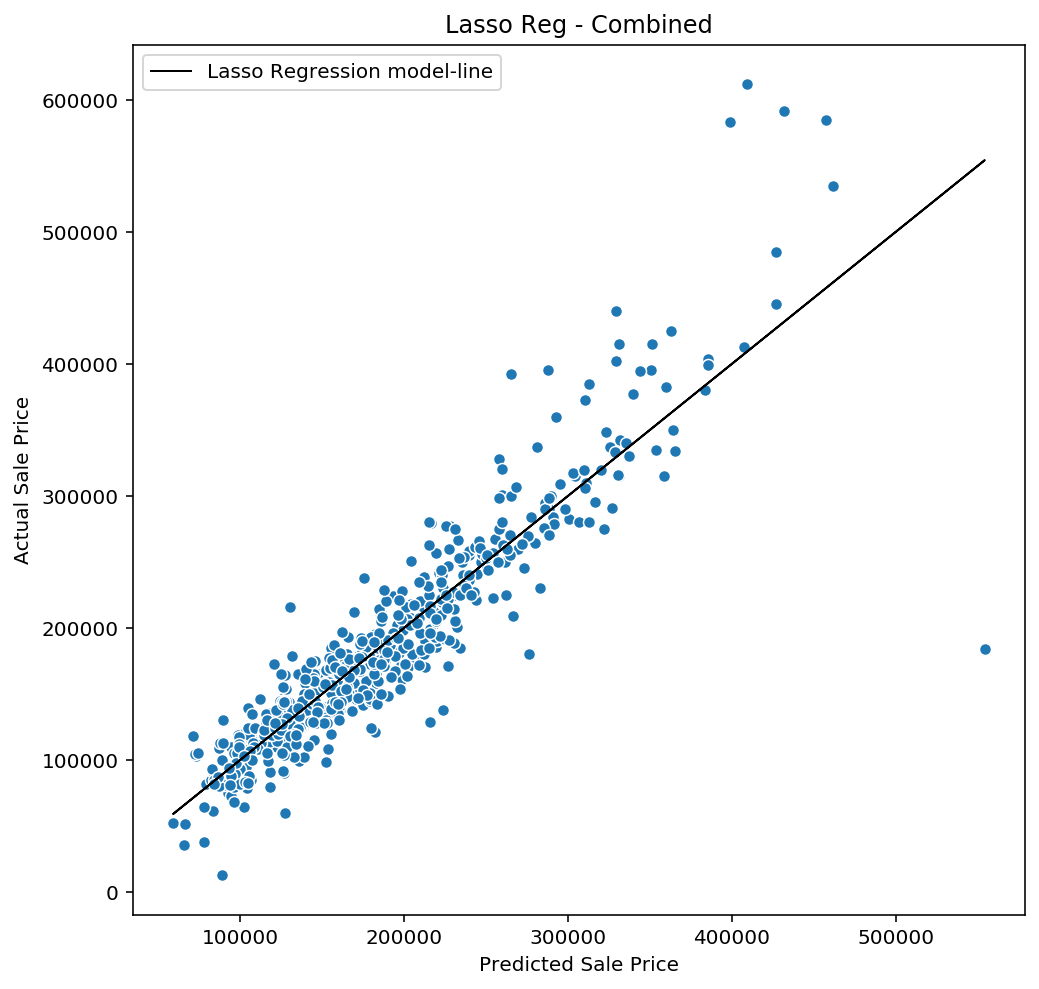

In [95]:
# Plotting the actual vs predicted price

plt.subplots(figsize=(8,8))
sns.scatterplot(x=lasso_reg_yhat, y=y_test)

plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.title("Lasso Reg - Combined")
plt.plot(lasso_reg_yhat, lasso_reg_yhat, color = "k", linewidth=1, label="Lasso Regression model-line")
plt.legend(loc="upper left");

In [96]:
# Getting the coefficients and features of this linear regression

combined_features = pd.DataFrame(combined_test.columns, columns=["Predictors"])
combined_features["Coeff"] = lasso_reg.coef_
combined_features.sort_values(by="Coeff", ascending=False)

,Predictors,Coeff
47,Overall Qual_10,79857.151302
55,Overall Qual_9,49513.830400
3,Gr Liv Area,25275.458238
54,Overall Qual_8,21549.742247
44,Neighborhood_StoneBr,18347.205152
70,Garage Cars_3.0,15611.333971
2,Total Bsmt SF,14303.255737
25,Neighborhood_Crawfor,13317.038459
1,BsmtFin SF 1,13112.700556
38,Neighborhood_NridgHt,9198.263079


In [97]:
# Calculating the correlation score

print("The correlation score is " + str(round(r2_score(lasso_reg_yhat, y_test), 3)))

The correlation score is 0.803


In [98]:
# Calculating the RMSE

print("The RMSE is " + str(round(mean_squared_error(lasso_reg_yhat, y_test)**0.5, 2)))

The RMSE is 31903.95


## 7. Pre-processing and prediction of actual test data

### 7.1) Examination of test data

- The linear regression and lasso regularization models have produced good "SalePrice" prediction scores.
- Using the same predictive features, we will now attempt to predict actual test data for this Kaggle competition.

In [99]:
# Opening test.csv

df_test = pd.read_csv("./datasets/test.csv")

In [100]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [101]:
# Obtaining all predictor features used in our training model
# Continuous = "Mas Vnr Area", "BsmtFin SF 1", "Total Bsmt SF", "Gr Liv Area", "Garage Area"
# Categorical = "Neighborhood", "Overall Qual", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Cars"

df_test_allfeatures = df_test[["Mas Vnr Area", "BsmtFin SF 1", "Total Bsmt SF", "Gr Liv Area",
                               "Garage Area", "Neighborhood", "Overall Qual", "Exter Qual",
                               "Bsmt Qual", "Kitchen Qual", "Garage Cars"]]
df_test_allfeatures.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Neighborhood,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Garage Cars
0,0.0,0,1020,1928,440,OldTown,6,TA,Fa,Fa,1
1,0.0,0,1967,1967,580,Sawyer,5,TA,Gd,TA,2
2,0.0,554,654,1496,426,Gilbert,7,Gd,Gd,Gd,2
3,0.0,0,968,968,480,OldTown,5,Gd,TA,TA,2
4,247.0,609,1394,1394,514,NAmes,6,TA,Gd,TA,2


In [102]:
df_test_allfeatures.shape

(879, 11)

In [103]:
# Checking for null or missing values

df_test_allfeatures.isnull().sum()   # There are missing value which needs to be dealt with

Mas Vnr Area      1
BsmtFin SF 1      0
Total Bsmt SF     0
Gr Liv Area       0
Garage Area       0
Neighborhood      0
Overall Qual      0
Exter Qual        0
Bsmt Qual        25
Kitchen Qual      0
Garage Cars       0
dtype: int64

In [104]:
df_test_allfeatures.dtypes   # Some datatypes need to be corrected

Mas Vnr Area     float64
BsmtFin SF 1       int64
Total Bsmt SF      int64
Gr Liv Area        int64
Garage Area        int64
Neighborhood      object
Overall Qual       int64
Exter Qual        object
Bsmt Qual         object
Kitchen Qual      object
Garage Cars        int64
dtype: object

In [105]:
df_test_allfeatures.describe()   # No negative or extreme outlier values

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Overall Qual,Garage Cars
count,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,106.982916,443.397042,1036.750853,1500.531286,470.832765,6.054608,1.744027
std,188.356829,442.480223,419.258428,517.413260,213.070155,1.374756,0.751162
min,0.000000,0.000000,0.000000,407.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,790.000000,1114.000000,323.000000,5.000000,1.000000
50%,0.000000,374.000000,975.000000,1436.000000,473.000000,6.000000,2.000000
75%,173.500000,735.500000,1248.000000,1781.000000,576.000000,7.000000,2.000000
max,1378.000000,2288.000000,3138.000000,4676.000000,1488.000000,10.000000,4.000000


### 7.2) Correcting of missing data

In [106]:
# Retreiving all rows with null values

df_test_allfeatures[df_test_allfeatures.isnull().any(axis=1)]

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Neighborhood,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Garage Cars
15,98.0,0,0,1340,252,Edwards,5,TA,NaN,TA,1
37,0.0,0,0,998,460,Sawyer,4,Fa,NaN,TA,2
77,75.0,0,0,1771,336,Mitchel,5,TA,NaN,TA,2
79,0.0,0,0,882,294,NAmes,5,TA,NaN,TA,1
113,0.0,0,0,1382,384,OldTown,4,TA,NaN,TA,1
145,0.0,0,0,1137,0,Edwards,5,TA,NaN,TA,0
190,0.0,0,0,944,528,Edwards,3,TA,NaN,Fa,2
206,0.0,0,0,1040,420,NAmes,4,TA,NaN,TA,2
279,0.0,0,0,1048,420,NAmes,5,TA,NaN,TA,2
292,0.0,0,0,1654,528,Sawyer,6,TA,NaN,TA,2


#### Comments:
- Row 866 has a missing "Mas Vnr Area" value and will be given a value of -1.0 to denote its unknown status (as per how we modelled our training data).
- Rows with missing "Bsmt Qual" values will be filled with "NA" to denote that this house does not have a basement (as per how we modelled out training data).

In [107]:
# Correcting Row 866 

df_test_allfeatures.at[866, "Mas Vnr Area"] = -1.0

In [108]:
# Getting indices of null "Bsmt Qual" rows

unique_indexes = df_test_allfeatures[df_test_allfeatures["Bsmt Qual"].isnull() == True].index

In [145]:
# Correcting null values of "Bsmt Qual" with "NA"

df_test_allfeatures.loc[unique_indexes, "Bsmt Qual"] = "NA"

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [110]:
df_test_allfeatures.isnull().sum()   # All null continuous variables are cleared.

Mas Vnr Area     0
BsmtFin SF 1     0
Total Bsmt SF    0
Gr Liv Area      0
Garage Area      0
Neighborhood     0
Overall Qual     0
Exter Qual       0
Bsmt Qual        0
Kitchen Qual     0
Garage Cars      0
dtype: int64

### 7.3) Feature engineering of continuous test data

In [111]:
# Scaling the test data
# SS is already fit_transformed using the training data. Test data only requires transformation.

X_test_kag = pd.DataFrame(ss.transform(df_test_allfeatures[["Mas Vnr Area", "BsmtFin SF 1", "Total Bsmt SF",
                                                            "Gr Liv Area", "Garage Area"]]),
                                                            columns=["Mas Vnr Area", "BsmtFin SF 1",
                                                                     "Total Bsmt SF", "Gr Liv Area", "Garage Area"])

In [112]:
X_test_kag.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area
0,-0.564635,-0.945278,-0.079111,0.872917,-0.152335
1,-0.564635,-0.945278,2.000305,0.951904,0.493827
2,-0.564635,0.242130,-0.882772,-0.002011,-0.216952
3,-0.564635,-0.945278,-0.193293,-1.071368,0.032282
4,0.818945,0.360013,0.742115,-0.208592,0.189208


In [113]:
# Engineering PolynomialFeatures on Kaggle test dataset
# The function poly has already been previously defined

X_test_kag_poly = poly.fit_transform(X_test_kag)
X_test_kag_poly[:2]

array([[-0.56463537, -0.945278  , -0.0791113 ,  0.87291733, -0.15233541,
         0.3188131 ,  0.53373739,  0.04466904, -0.49287999,  0.08601396,
         0.8935505 ,  0.07478217, -0.82514954,  0.14399931,  0.0062586 ,
        -0.06905762,  0.01205145,  0.76198466, -0.13297622,  0.02320608],
       [-0.56463537, -0.945278  ,  2.00030497,  0.95190393,  0.49382686,
         0.3188131 ,  0.53373739, -1.12944293, -0.53747862, -0.27883211,
         0.8935505 , -1.89084428, -0.89981384, -0.46680367,  4.00121998,
         1.90409816,  0.98780432,  0.90612109,  0.47007573,  0.24386497]])

In [114]:
# Creating a dataframe of engineered Kaggle test data

X_test_kag_poly_df = pd.DataFrame(X_test_kag_poly, columns=poly.get_feature_names(X_test_kag.columns))

In [115]:
X_test_kag_poly_df.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Mas Vnr Area^2,Mas Vnr Area BsmtFin SF 1,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Gr Liv Area,Mas Vnr Area Garage Area,BsmtFin SF 1^2,BsmtFin SF 1 Total Bsmt SF,BsmtFin SF 1 Gr Liv Area,BsmtFin SF 1 Garage Area,Total Bsmt SF^2,Total Bsmt SF Gr Liv Area,Total Bsmt SF Garage Area,Gr Liv Area^2,Gr Liv Area Garage Area,Garage Area^2
0,-0.564635,-0.945278,-0.079111,0.872917,-0.152335,0.318813,0.533737,0.044669,-0.492880,0.086014,0.893550,0.074782,-0.825150,0.143999,0.006259,-0.069058,0.012051,0.761985,-0.132976,0.023206
1,-0.564635,-0.945278,2.000305,0.951904,0.493827,0.318813,0.533737,-1.129443,-0.537479,-0.278832,0.893550,-1.890844,-0.899814,-0.466804,4.001220,1.904098,0.987804,0.906121,0.470076,0.243865
2,-0.564635,0.242130,-0.882772,-0.002011,-0.216952,0.318813,-0.136715,0.498444,0.001136,0.122499,0.058627,-0.213745,-0.000487,-0.052530,0.779286,0.001775,0.191519,0.000004,0.000436,0.047068
3,-0.564635,-0.945278,-0.193293,-1.071368,0.032282,0.318813,0.533737,0.109140,0.604932,-0.018228,0.893550,0.182715,1.012741,-0.030516,0.037362,0.207087,-0.006240,1.147830,-0.034586,0.001042
4,0.818945,0.360013,0.742115,-0.208592,0.189208,0.670671,0.294831,0.607752,-0.170825,0.154951,0.129609,0.267171,-0.075096,0.068117,0.550735,-0.154799,0.140414,0.043510,-0.039467,0.035799


In [116]:
X_test_kag_poly_df.shape   # The shape of this dataframe is correct

(879, 20)

### 7.4) Creating dummy variables from categorical test data

- Because the categorical values from the Kaggle test data may not fully reflect the range of values of the Kaggle training data, it is necessary to concatenate them to produce dummy variables.

In [117]:
# Recreating the original Kaggle Training data - See section 6.5.1

X_train_kag = pd.concat([X_train, X_test])

In [119]:
# Finding the length of this X_train_kag

len_train_kag = len(X_train_kag)
len_train_kag   # 2051 rows

2051

In [120]:
X_train_kag.shape

(2051, 47)

In [121]:
# Retreiving the categorical features used in our modelling
# "Neighborhood", "Overall Qual", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Cars"

# From the Kaggle training set
output1 = X_train_kag[["Neighborhood", "Overall Qual", "Exter Qual", 
                       "Bsmt Qual", "Kitchen Qual", "Garage Cars"]]

In [122]:
# From the Kaggle test set

output2 = df_test_allfeatures[["Neighborhood", "Overall Qual", "Exter Qual",
                               "Bsmt Qual", "Kitchen Qual", "Garage Cars"]]

In [123]:
# Concatenating the Kaggel training and Kaggle test dataset for dummy variable encoding

X_traintest_concat_kag = pd.concat([output1, output2])
X_traintest_concat_kag.shape   # Number of shape of this dataframe is correct

(2930, 6)

In [124]:
X_traintest_concat_kag.head()

,Neighborhood,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Garage Cars
0,Sawyer,6,Gd,TA,Gd,2.0
1,SawyerW,7,Gd,Gd,Gd,2.0
2,NAmes,5,TA,TA,Gd,1.0
3,Timber,5,TA,Gd,TA,2.0
4,SawyerW,6,TA,Fa,TA,2.0


In [125]:
# Creating dummy variables from these 6 categorical features

df_categorical_dummy = pd.get_dummies(X_traintest_concat_kag.astype(str), drop_first=True)

In [126]:
df_categorical_dummy.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Bsmt Qual_UnKn,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [127]:
df_categorical_dummy.shape   # There is 1 more column than the Kaggle Training set, this has to be removed.

(2930, 54)

In [128]:
# Getting the common dummy features from the Kaggle Training and Test set

temp1 = candidate_X_test_dummy.columns
temp2 = df_categorical_dummy.columns
list(set(temp2) - set(temp1))   # The extra feature in the Kaggle test data is "Kitchen Qual_Po"

['Kitchen Qual_Po']

In [129]:
# Dropping "Kitchen Qual Po" from the Kaggle Test data

df_categorical_dummy.drop(["Kitchen Qual_Po"], axis=1, inplace=True)

In [130]:
# The extra dummy feature has been removed from the Kaggle Test data

df_categorical_dummy.shape

(2930, 53)

In [131]:
# Splitting back the Kaggle training and Kaggle test dataset
# The Kaggle training set ends in row 2051

X_kag_train_dummy, X_kag_test_dummy = df_categorical_dummy.iloc[:2051, :], df_categorical_dummy.iloc[2051:, :]

In [132]:
X_kag_test_dummy.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,...,Bsmt Qual_TA,Bsmt Qual_UnKn,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [133]:
X_kag_test_dummy.shape   # The shape of the Kaggle Test dataset is correct

(879, 53)

### 7.5) Combining the dummy variables with the engineered continuous features

In [134]:
# Combining the Kaggle test datasets (categorical_dummies + continuous_features)

combined_kag_test = X_test_kag_poly_df.merge(X_kag_test_dummy, how='outer', left_index=True, right_index=True)

In [135]:
combined_kag_test.head()

,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Garage Area,Mas Vnr Area^2,Mas Vnr Area BsmtFin SF 1,Mas Vnr Area Total Bsmt SF,Mas Vnr Area Gr Liv Area,Mas Vnr Area Garage Area,...,Bsmt Qual_TA,Bsmt Qual_UnKn,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Cars_1.0,Garage Cars_2.0,Garage Cars_3.0,Garage Cars_4.0,Garage Cars_5.0
0,-0.564635,-0.945278,-0.079111,0.872917,-0.152335,0.318813,0.533737,0.044669,-0.492880,0.086014,...,0,0,1,0,0,1,0,0,0,0
1,-0.564635,-0.945278,2.000305,0.951904,0.493827,0.318813,0.533737,-1.129443,-0.537479,-0.278832,...,0,0,0,0,1,0,1,0,0,0
2,-0.564635,0.242130,-0.882772,-0.002011,-0.216952,0.318813,-0.136715,0.498444,0.001136,0.122499,...,0,0,0,1,0,0,1,0,0,0
3,-0.564635,-0.945278,-0.193293,-1.071368,0.032282,0.318813,0.533737,0.109140,0.604932,-0.018228,...,1,0,0,0,1,0,1,0,0,0
4,0.818945,0.360013,0.742115,-0.208592,0.189208,0.670671,0.294831,0.607752,-0.170825,0.154951,...,0,0,0,0,1,0,1,0,0,0


In [136]:
combined_kag_test.shape   # The number of rows and columns in this Kaggle test dataset is correct

(879, 73)

### 7.6) Prediction of actual Kaggle test data

In [137]:
X_kaggle_test = combined_kag_test

In [138]:
# Getting the test row IDs

df_test_id = df_test[["Id"]]

In [139]:
df_test_id.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [140]:
# Predicting using Linear Regression

kaggle_lr_predict = pd.DataFrame(lr_mod.predict(X_kaggle_test), columns=["SalePrice"])
kaggle_lr_predict.head()

,SalePrice
0,149494.843595
1,189559.875529
2,195778.197157
3,99787.162307
4,177035.581160


In [141]:
# Predicting using Lasso Regression

kaggle_lasso_predict = pd.DataFrame(lasso_reg.predict(X_kaggle_test), columns=["SalePrice"])
kaggle_lasso_predict.head()

,SalePrice
0,161517.149966
1,203382.551453
2,191767.087107
3,106562.748983
4,183407.983393


In [142]:
# Combining the dataframes for individual submission
# Linear regression model

submit_linear = df_test_id.merge(kaggle_lr_predict, how='outer', left_index=True, right_index=True)
submit_linear.head()

,Id,SalePrice
0,2658,149494.843595
1,2718,189559.875529
2,2414,195778.197157
3,1989,99787.162307
4,625,177035.581160


In [143]:
# Combining the dataframes for individual submission
# Lasso regularization model

submit_lasso = df_test_id.merge(kaggle_lasso_predict, how='outer', left_index=True, right_index=True)
submit_lasso.head()

,Id,SalePrice
0,2658,161517.149966
1,2718,203382.551453
2,2414,191767.087107
3,1989,106562.748983
4,625,183407.983393


In [144]:
# Saving to CSVs

# Linear Regression
submit_linear.to_csv("./datasets/submit_linear.csv", index=False)

# Lasso Regularization
submit_lasso.to_csv("./datasets/submit_lasso.csv", index=False)

## 8. Final test scores

### Comments:

1) Using linear regression, my model was able to achieve:
    - Private score: 30262.79739
    - Public score: 28869.87628
    
2) Using lasso regularization, my model was able to achieve:
    - Private score: 31505.63171
    - Public score: 30562.33751

## 9. Conclusion

- Through the exercise, it is interesting to observe that the features which best predict the house sale price were "general" in nature. By this, I found that people largely based their sale price on features such as number of square-feet (area), housing build quality, and the neighborhood it is located in (i.e. common features which every house should have). 

- This discovery also gives me confidence that our model is sufficiently generalized to be applied across future instances within the city of Ames, IA for sale price predictions, or as a guide for property evaluators.

- Overall, this exercise has provided the exposure towards data cleaning, engineering and modelling real-life data problems. Subsequently, as more advanced machine learning technique would be taught, this project may be revisited to find ways to better improve the Kaggle test scores.